## 边缘检测

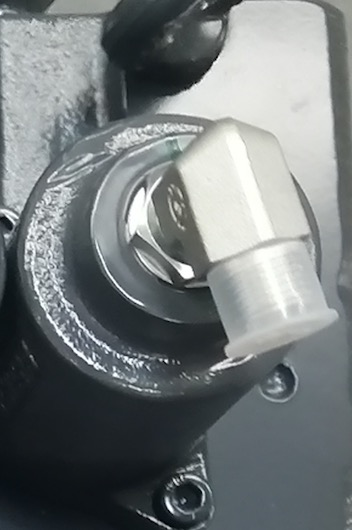

In [68]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
im = cv2.imread('main_valve/1.02.jpg')
#plt.imshow(im[:,:,::-1])
Image.fromarray(im[:,:,::-1])

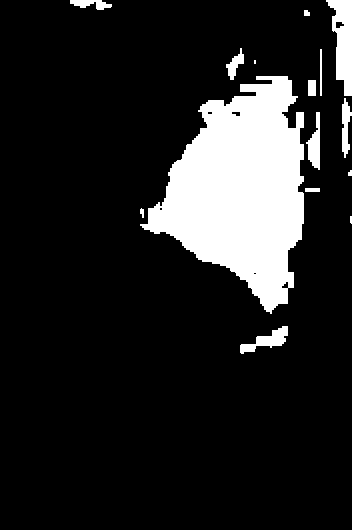

In [69]:
hsv = cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
x=hsv[:,:,2].copy()
x-=np.min(x)
x=x/np.max(x)*255

Image.fromarray(((x<np.mean(x)*0.6)*255).astype(np.uint8))

122

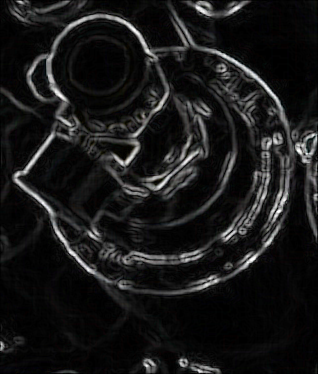

In [61]:
size=3
gx = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=size)
gx = cv2.convertScaleAbs(gx)
gy = cv2.Sobel(im, cv2.CV_64F, 0, 1, ksize=size)
gy = cv2.convertScaleAbs(gy)

g = cv2.addWeighted(gx,0.5,gy,0.5,0)
#plt.imshow(g)
Image.fromarray(g)

## 直线检测

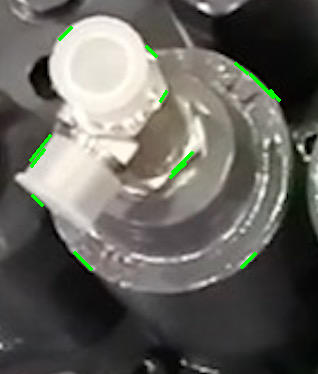

In [62]:
import numpy as np
img = im.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = (g>120).astype(np.uint8)*255
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

minLineLength = 50
maxLineGap = 10

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, minLineLength, maxLineGap)
#print("Len of lines:", len(lines))
# print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

Image.fromarray(img[:,:,::-1])

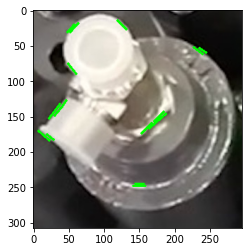

In [131]:
plt.imshow(img[:,:,::-1])

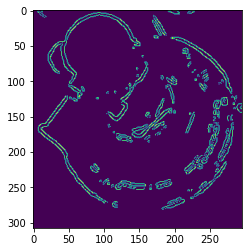

In [132]:
plt.imshow(edges)

In [72]:
np.unique(gray)

array([0], dtype=uint8)

In [58]:
np.unique(g>127)

array([False,  True])

In [71]:
gray

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## 模板匹配

In [7]:
img_rgb = cv2.imread('main_valve.01.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('temp01.jpg', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.7

loc = np.where(res >= threshold)
print(len(loc))

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
    print("rectangle 1")

NameError: name 'np' is not defined

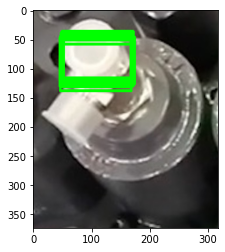

In [148]:
plt.imshow(img_rgb[:,:,::-1])

In [143]:
loc

(array([330, 331, 331, 332, 332, 332, 333, 333, 333, 333, 334, 334, 334,
        334, 335, 335, 335, 335, 336, 336, 336, 336, 337, 337, 337, 337,
        337, 338, 338, 338, 338, 338, 339, 339, 339, 339, 340, 340, 340]),
 array([408, 407, 408, 407, 408, 409, 406, 407, 408, 409, 406, 407, 408,
        409, 406, 407, 408, 409, 406, 407, 408, 409, 405, 406, 407, 408,
        409, 405, 406, 407, 408, 409, 406, 407, 408, 409, 406, 407, 408]))

## 特征点匹配

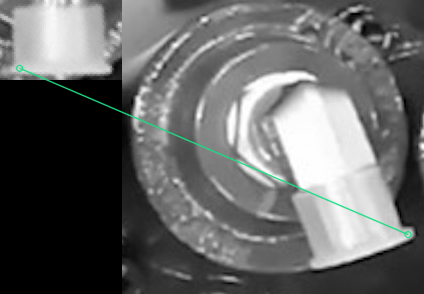

In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img2 = cv2.imread('main_valve.04.jpg', 0)
# queryImage
img1 = cv2.imread('temp01.jpg', 0)  # trainImage
# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
# 比值测试，首先获取与 A距离最近的点 B （最近）和 C （次近），
# 只有当 B/C 小于阀值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离为0
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
# img3 = np.ndarray([2, 2])
# img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], img3, flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

Image.fromarray(img3[:,:,::-1])

## 形状匹配

In [8]:
def get_binary(im):
    size=3
    gx = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=size)
    gx = cv2.convertScaleAbs(gx)
    gy = cv2.Sobel(im, cv2.CV_64F, 0, 1, ksize=size)
    gy = cv2.convertScaleAbs(gy)

    g = cv2.addWeighted(gx,0.5,gy,0.5,0)
    # return (g>120).astype(np.uint8)*255
    return g


In [32]:
#性状匹配
img2 = cv2.imread('main_valve.01.jpg')
img1 = cv2.imread('temp01.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#ret, thresh1 = cv2.threshold(gray1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#cv2.imshow('thresh1', thresh1)
thresh1=get_binary(gray1)

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#ret, thresh2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#cv2.imshow('thresh2', thresh2)
thresh2=get_binary(gray2)


copyImage1, contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
copyImage2, contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours1[0]

for i, cnt in enumerate(contours2):
    print(i)
    #找到性状的重心
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(cx, cy)
    cv2.circle(img2, (cx, cy), 5, (0,255,0), -1)
    #性状匹配
    ret = cv2.matchShapes(cnt1, cnt, 3, 0.0)
    print(ret)
    # cv2.imshow('img'+str(i), gray2)

0
158 186
0.3767271954434232


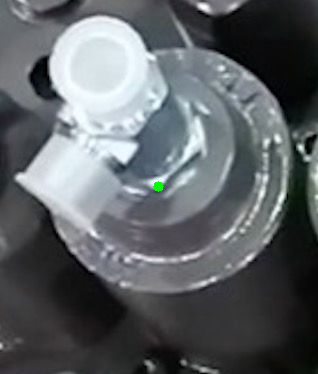

In [33]:
Image.fromarray(img2)

In [24]:

moment = cv2.moments(gray2)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moment)

In [25]:
huMoments

array([[ 1.24223723e-03],
       [ 5.17604409e-08],
       [ 4.70412645e-11],
       [ 6.68822319e-11],
       [-1.14123697e-21],
       [ 1.50149906e-14],
       [ 3.57370598e-21]])

In [27]:
moment = cv2.moments(gray1)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moment)
huMoments

array([[ 8.58235648e-04],
       [ 8.39894112e-08],
       [ 3.76102655e-12],
       [ 8.43857924e-15],
       [-3.44607810e-28],
       [ 3.44375127e-19],
       [-1.46331011e-27]])

In [34]:
Image.fromarray(copyImage1),Image.fromarray(img1)

(<PIL.Image.Image image mode=L size=122x80 at 0x11E1F0FD0>,
 <PIL.Image.Image image mode=RGB size=122x80 at 0x11E1F0CC0>)

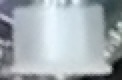

In [35]:
Image.fromarray(img1)

## 角点检测

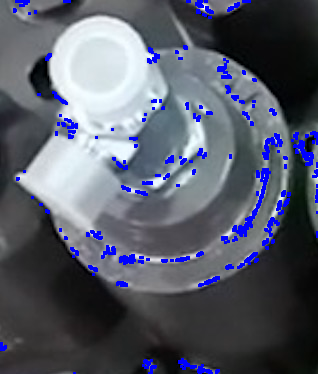

In [52]:
im = cv2.imread('main_valve.01.jpg')

img = im.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# 输入图像必 是 float32 最后一个参数在 0.04 到 0.05 之间
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

Image.fromarray(img)

In [8]:
hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
Image.fromarray(hsv[:,:,0])

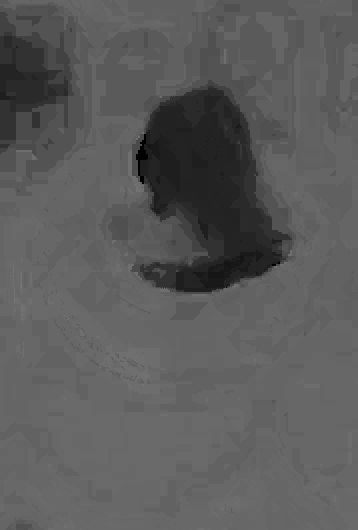

In [11]:
Image.fromarray(hsv[:,:,0])

## 颜色统计

In [1]:
import os
import cv2
import numpy as np

def color_mask(hsv, gray, color):
    h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

    if color == 'gray':
        return np.logical_and(np.logical_and(v <= 220, gray <= 150),
                              np.logical_and(s <= 43, v >= 46))
    elif color == 'black':
        return v <= 46
    elif color == 'red':
        return np.logical_and(np.logical_or(h >= 156, h <= 10),
                              np.logical_and(s >= 43, v >= 46))
    elif color == 'orange':
        return np.logical_and(np.logical_and(h >= 11, h <= 25),
                              np.logical_and(s >= 43, v >= 46))
    elif color == 'yellow':
        return np.logical_and(np.logical_and(h >= 26, h <= 34),
                              np.logical_and(s >= 43, v >= 46))
    elif color == 'green':
        return np.logical_and(np.logical_and(h >= 35, h <= 77),
                              np.logical_and(s >= 43, v >= 46))
    elif color == 'cyan':
        return np.logical_and(np.logical_and(h >= 78, h <= 99),
                              np.logical_and(s >= 43, v >= 46))
    elif color == 'blue':
        return np.logical_and(np.logical_and(h >= 100, h <= 124),
                              np.logical_and(s >= 43, v >= 46))
    elif color == 'purple':
        return np.logical_and(np.logical_and(h >= 125, h <= 155),
                              np.logical_and(s >= 43, v >= 46))


def get_all_color_mask(im_bgr):
    hsv = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2HSV)
    gray = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2GRAY)
    color_list = ['gray', 'black', 'red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple']
    mask_dict = {}
    for color in color_list:
        mask_dict[color] = color_mask(hsv, gray, color)

    return mask_dict


def save_color_area(im_path, out_dir):
    im_name = os.path.splitext(os.path.basename(im_path))[0]
    im = cv2.imread(im_path)
    mask_dict = get_all_color_mask(im)

    for color, mask in mask_dict.items():
        out_color_dir = os.path.join(out_dir, color)
        if not os.path.exists(out_color_dir):
            os.mkdir(out_color_dir)
        mask = mask.astype(np.uint8)
        mask = cv2.erode(mask, kernel=np.ones((3, 3)))
        mask = cv2.dilate(mask, kernel=np.ones((3, 3)), iterations=1)
        _, contours, hierarchy = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for i, cnt in enumerate(contours):
            out_path = os.path.join(out_color_dir, '{}_{:03d}.jpg'.format(im_name, i))
            x, y, w, h = cv2.boundingRect(cnt)
            if w * h > 60:
                cv2.imwrite(out_path, im[y:y + h, x:x + w])

In [2]:
!rm -rf ./output/*

In [4]:
save_color_area('main_valve.01.jpg','./output/')

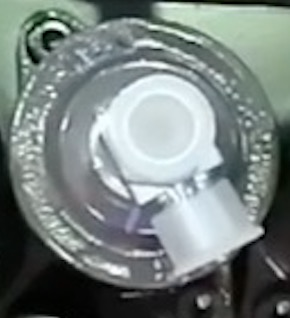

In [12]:
#im = cv2.imread('temp01.jpg')
im = cv2.imread('main_valve.03.jpg')
img = im.copy()

mask=np.stack(list(get_all_color_mask(im).values()),axis=0).astype(np.uint32)
Image.fromarray(img)

In [6]:
im = cv2.imread('main_valve/1.01.jpg')
img = im.copy()
# 颜色区域提取
mask=np.stack(list(get_all_color_mask(im).values()),axis=0).astype(np.uint32)
mask_all = np.sum(mask,axis=0)
mask_all=(mask_all==0).astype(np.uint8) * 255
# Image.fromarray(mask_all)
# 开区间
open = cv2.morphologyEx(mask_all, cv2.MORPH_OPEN, kernel=np.ones((3, 3)), iterations=5)
#Image.fromarray(open)

# 取最大连通域
# _, 
contours, hierarchy = cv2.findContours((open).astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
max_area_idx = -1
max_area = 0
for i,contour in enumerate(contours):
    area=cv2.contourArea(contour)
    if area > max_area:
        max_area_idx=i
        max_area = area

new_mask=np.zeros_like(mask_all,np.uint8)
new_mask=cv2.fillConvexPoly(new_mask,contours[max_area_idx],1)
Image.fromarray(new_mask*255)



img=im.copy()

# 画直线
minLineLength = 100
maxLineGap = 20
lines = cv2.HoughLinesP(get_binary(new_mask), 1, np.pi / 180, 60, minLineLength, maxLineGap)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
# 最小外接矩形
rect=cv2.minAreaRect(contours[max_area_idx])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),1)
Image.fromarray(img[:,:,::-1])

NameError: name 'get_binary' is not defined

In [5]:
# 拼接
x = np.zeros_like(img)
x = x + mask_all[:,:,np.newaxis]
y = np.zeros_like(img)
y = y + new_mask[:,:,np.newaxis]*255
Image.fromarray(np.concatenate([x,y,img[:,:,::-1]],axis=0))

NameError: name 'new_mask' is not defined

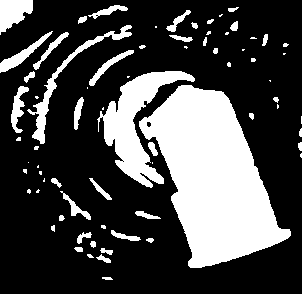

In [14]:
# close = cv2.morphologyEx(mask_all, cv2.MORPH_CLOSE, kernel=np.ones((3, 3)))
# Image.fromarray(close)
Image.fromarray(mask_all)

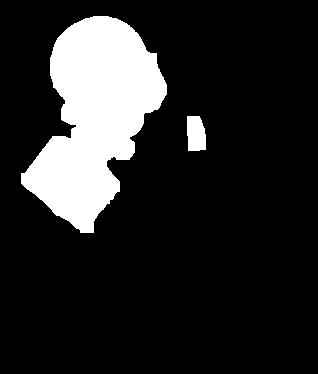

In [293]:
np.sum(mask_all==0),np.sum(mask_all==1)
(mask_all==1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

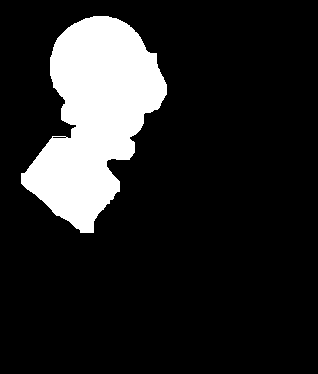

In [295]:
np.sum(new_mask==1),np.sum(new_mask==0)

(17579, 101353)

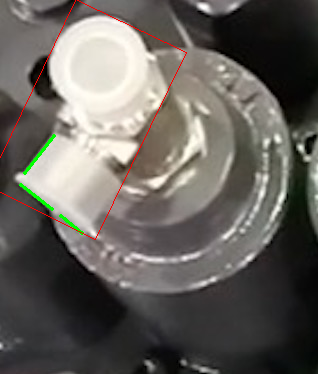

In [296]:
img=im.copy()
minLineLength = 100
maxLineGap = 20
lines = cv2.HoughLinesP(get_binary(new_mask), 1, np.pi / 180, 60, minLineLength, maxLineGap)
#print("Len of lines:", len(lines))
# print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
# 最小外接矩形
rect=cv2.minAreaRect(contours[max_area_idx])
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),1)
Image.fromarray(img[:,:,::-1])

In [299]:
lines,rect,box

(array([[[ 20, 184,  52, 209]],
 
        [[ 60, 215,  82, 233]],
 
        [[ 24, 173,  54, 135]]], dtype=int32),
 ((85.74349975585938, 119.06129455566406),
  (208.28147888183594, 122.59383392333984),
  -64.14813232421875),
 array([[ 95, 239],
        [-14, 186],
        [ 75,  -1],
        [186,  52]]))

In [ ]:
(x,y)

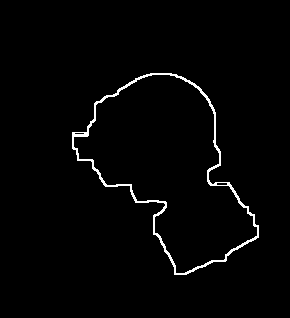

In [241]:
Image.fromarray(get_binary(new_mask)*255)

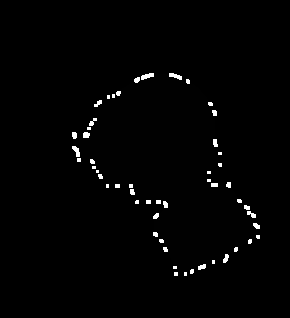

In [242]:
dst = cv2.cornerHarris(new_mask, 2, 3, 0.04)
# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
x = new_mask.copy()
x[dst > 0.01 * dst.max()] = 255

Image.fromarray(x)

## 计算角度

In [4]:
import math
def azimuth_angle(x1, y1, x2, y2):
    angle = 0.0
    dx = x2 - x1
    dy = y2 - y1
    if x2 == x1:
        angle = math.pi / 2.0
        if y2 == y1:
            angle = 0.0
        elif y2 < y1:
            angle = 3.0 * math.pi / 2.0
    elif x2 > x1 and y2 > y1:
        angle = math.atan(dx / dy)
    elif x2 > x1 and y2 < y1:
        angle = math.pi / 2 + math.atan(-dy / dx)
    elif x2 < x1 and y2 < y1:
        angle = math.pi + math.atan(dx / dy)
    elif x2 < x1 and y2 > y1:
        angle = 3.0 * math.pi / 2.0 + math.atan(dy / -dx)
    return angle * 180 / math.pi

In [5]:
azimuth_angle(217,459,86,285)

216.9751239361938

In [6]:
azimuth_angle(86,285,376,67)

126.93306827020692

In [19]:
math.atan2(67-285,376-86)*180/math.pi

-36.9330682702069